In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp /content/kaggle2.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


**Importing dataset from kaggle**

In [3]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:27<00:00, 34.4MB/s]
100% 812M/812M [00:27<00:00, 31.4MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle2.json	sample_data


In [5]:
# Create a directory to extract the files to (if it doesn't exist)
!mkdir -p /content/dogs-vs-cats

# Extract the contents of the zip file into the directory
!unzip /content/dogs-vs-cats.zip -d /content/dogs-vs-cats


Archive:  /content/dogs-vs-cats.zip
  inflating: /content/dogs-vs-cats/sampleSubmission.csv  
  inflating: /content/dogs-vs-cats/test1.zip  
  inflating: /content/dogs-vs-cats/train.zip  


**Extracting the zip file**

In [6]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("Dataset is extracted")

Dataset is extracted


In [7]:
from zipfile import ZipFile

dataset = '/content/train.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("Train zip is extracted")

Train zip is extracted


In [8]:
import os

path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("Number of images:", file_count)

Number of images: 25000


In [9]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.1953.jpg', 'dog.10579.jpg', 'dog.8628.jpg', 'cat.8093.jpg', 'cat.4780.jpg', 'dog.4675.jpg', 'dog.4733.jpg', 'dog.11132.jpg', 'dog.8344.jpg', 'cat.8488.jpg', 'cat.4494.jpg', 'cat.1059.jpg', 'dog.432.jpg', 'dog.3569.jpg', 'dog.10569.jpg', 'dog.5915.jpg', 'cat.6205.jpg', 'cat.10037.jpg', 'dog.2235.jpg', 'dog.5093.jpg', 'cat.1739.jpg', 'cat.10607.jpg', 'dog.7030.jpg', 'cat.6736.jpg', 'dog.8442.jpg', 'cat.11688.jpg', 'cat.2977.jpg', 'cat.4862.jpg', 'dog.6858.jpg', 'dog.3836.jpg', 'dog.8841.jpg', 'cat.600.jpg', 'dog.3011.jpg', 'dog.10689.jpg', 'dog.8424.jpg', 'dog.3881.jpg', 'dog.4974.jpg', 'cat.89.jpg', 'dog.10539.jpg', 'cat.10271.jpg', 'cat.2813.jpg', 'dog.3258.jpg', 'dog.7878.jpg', 'cat.11.jpg', 'dog.4833.jpg', 'cat.6781.jpg', 'dog.10061.jpg', 'cat.8971.jpg', 'cat.11643.jpg', 'cat.9362.jpg', 'dog.2798.jpg', 'cat.8666.jpg', 'dog.5130.jpg', 'cat.11269.jpg', 'cat.4776.jpg', 'dog.7903.jpg', 'cat.4336.jpg', 'cat.8544.jpg', 'dog.2965.jpg', 'dog.1359.jpg', 'dog.5221.jpg', 'dog.7822.jpg', '

**Importing the dependencies**

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as matimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

**Displaying the images of train dataset**

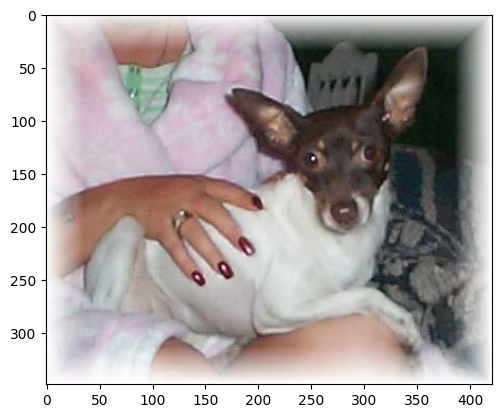

In [11]:
img = matimg.imread('/content/train/dog.10579.jpg')
plt.imshow(img)

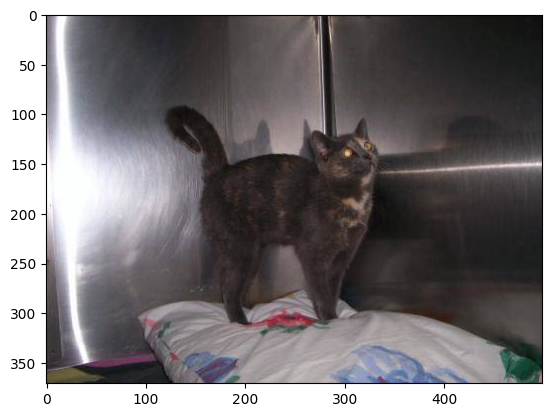

In [12]:
img1 = matimg.imread('/content//train/cat.4780.jpg')
plt.imshow(img1)

**As Inceptionv3 is used, it should be in 224x 224 pixels, Scaling the images**

In [13]:
file_names = os.listdir('/content/train/')

for i in range(5):
  print(file_names[i])

cat.1953.jpg
dog.10579.jpg
dog.8628.jpg
cat.8093.jpg
cat.4780.jpg


In [14]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for image_file in file_names:
  name = image_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print("Dog count: ",dog_count)
print("Cat count: ",cat_count)


Dog count:  12500
Cat count:  12500


**Resizing all images**

In [15]:
os.mkdir('/content/image resized')

In [16]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  file_name = os.listdir(original_folder)[i]
  image_path = original_folder+file_name

  img = Image.open(image_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+file_name
  img.save(newImgPath)


**Resized images**

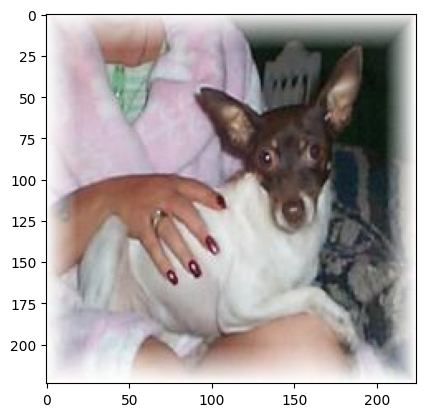

In [17]:
img = matimg.imread('/content/image resized/dog.10579.jpg')
plt.imshow(img)

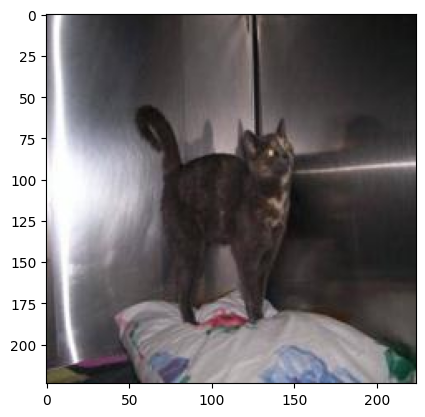

In [18]:
img1 = matimg.imread('/content/image resized/cat.4780.jpg')
plt.imshow(img1)

**Creating labels for resized images for dogs and cats**

Cat -> 0

Dog -> 1

In [19]:
file_names= os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = file_names[i]
  label = file_name[0:3]

  if label == 'cat':
    labels.append(0)

  else:
    labels.append(1)

In [20]:
print(file_names[0:5])
print(len(file_names))

['cat.1953.jpg', 'dog.10579.jpg', 'dog.8628.jpg', 'cat.8093.jpg', 'cat.4780.jpg']
2000


In [21]:
print(labels[0:5])
print(len(labels))

[0, 1, 1, 0, 0]
2000


**Couting images of dogs and cats out of 2000 images**

In [22]:
values, counts = np.unique(labels, return_counts =True)

print(values)
print(counts)

[0 1]
[ 958 1042]


In [23]:
import cv2
import glob

In [24]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [25]:
print(dog_cat_images)

[[[[168 152 136]
   [236 220 204]
   [162 146 130]
   ...
   [198 227 242]
   [196 225 239]
   [193 222 236]]

  [[170 154 138]
   [234 218 202]
   [165 149 133]
   ...
   [198 227 242]
   [196 225 239]
   [194 223 237]]

  [[165 150 134]
   [225 210 194]
   [169 154 138]
   ...
   [199 228 243]
   [197 226 240]
   [194 223 237]]

  ...

  [[133 151 162]
   [133 151 162]
   [132 149 162]
   ...
   [196 222 236]
   [189 215 229]
   [190 216 230]]

  [[132 150 161]
   [133 151 162]
   [135 152 165]
   ...
   [194 220 234]
   [187 213 227]
   [192 218 232]]

  [[140 158 169]
   [142 160 171]
   [142 159 172]
   ...
   [191 217 231]
   [184 210 224]
   [192 218 232]]]


 [[[251 250 254]
   [251 250 254]
   [251 250 254]
   ...
   [241 242 246]
   [244 245 249]
   [249 250 254]]

  [[251 250 254]
   [249 248 252]
   [248 247 251]
   ...
   [234 235 239]
   [240 241 245]
   [246 247 251]]

  [[251 250 254]
   [248 247 251]
   [245 244 248]
   ...
   [227 228 232]
   [238 239 243]
   [246 247

In [26]:
type(dog_cat_images)

numpy.ndarray

In [27]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [28]:
X = dog_cat_images
Y = np.asarray(labels)

**Train test split**

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state =2)


In [30]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 -> Training images

400 -> Testing images

**Scaling the data**

In [31]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255



In [32]:
print(X_train_scaled)


[[[[0.1372549  0.06666667 0.0627451 ]
   [0.15686275 0.08627451 0.08235294]
   [0.19607843 0.11764706 0.11372549]
   ...
   [0.33333333 0.23529412 0.01568627]
   [0.32941176 0.23921569 0.01960784]
   [0.32941176 0.23921569 0.01960784]]

  [[0.14901961 0.0745098  0.0627451 ]
   [0.15686275 0.08235294 0.07058824]
   [0.18431373 0.10196078 0.09411765]
   ...
   [0.33333333 0.23529412 0.01568627]
   [0.32941176 0.23921569 0.01960784]
   [0.32941176 0.23921569 0.01960784]]

  [[0.18823529 0.10980392 0.09019608]
   [0.18823529 0.10196078 0.08235294]
   [0.20392157 0.10980392 0.08627451]
   ...
   [0.33333333 0.23529412 0.01568627]
   [0.32941176 0.23921569 0.01960784]
   [0.32941176 0.23921569 0.01960784]]

  ...

  [[0.39607843 0.46666667 0.53333333]
   [0.39215686 0.4627451  0.52941176]
   [0.38823529 0.45882353 0.5254902 ]
   ...
   [0.47058824 0.3254902  0.23921569]
   [0.4745098  0.34117647 0.25098039]
   [0.48235294 0.34901961 0.25882353]]

  [[0.40784314 0.47843137 0.54509804]
   [0.4

In [33]:
print(X_test_scaled)

[[[[0.15294118 0.12941176 0.36078431]
   [0.17254902 0.14901961 0.38039216]
   [0.17647059 0.15294118 0.38431373]
   ...
   [0.11764706 0.19607843 0.29411765]
   [0.24705882 0.32941176 0.41176471]
   [0.70588235 0.8        0.87058824]]

  [[0.14117647 0.12156863 0.3372549 ]
   [0.16078431 0.14117647 0.35686275]
   [0.16862745 0.14901961 0.36470588]
   ...
   [0.1372549  0.20392157 0.30588235]
   [0.37254902 0.45490196 0.5372549 ]
   [0.79215686 0.88627451 0.95686275]]

  [[0.12941176 0.12941176 0.31764706]
   [0.14117647 0.14117647 0.32941176]
   [0.14901961 0.14901961 0.3372549 ]
   ...
   [0.10980392 0.18039216 0.27058824]
   [0.4745098  0.56078431 0.63137255]
   [0.81960784 0.90980392 0.97254902]]

  ...

  [[0.25490196 0.24313725 0.39607843]
   [0.27843137 0.26666667 0.41960784]
   [0.28627451 0.2745098  0.42745098]
   ...
   [0.41176471 0.38823529 0.58039216]
   [0.41176471 0.38823529 0.58039216]
   [0.41176471 0.38823529 0.58039216]]

  [[0.24705882 0.23921569 0.38039216]
   [0.2

**Building the neural network**

In [34]:
import tensorflow as tf
import tensorflow_hub as hub

In [37]:
mobile_net_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pre_trained_model = hub.KerasLayer(mobile_net_model, input_shape=(224, 224, 3), trainable=False)

In [39]:
num_of_classes =2

model = tf.keras.Sequential([

                             pre_trained_model,
                             tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [42]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)


In [43]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 67s 1s/step - loss: 0.2641 - acc: 0.8825
Epoch 2/5
50/50 [==============================] - 62s 1s/step - loss: 0.0808 - acc: 0.9694
Epoch 3/5
50/50 [==============================] - 61s 1s/step - loss: 0.0568 - acc: 0.9800
Epoch 4/5
50/50 [==============================] - 60s 1s/step - loss: 0.0445 - acc: 0.9869
Epoch 5/5
50/50 [==============================] - 67s 1s/step - loss: 0.0365 - acc: 0.9875


In [44]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print("Test loss: ", score)
print("Test accuracy: ", acc)

13/13 [==============================] - 17s 1s/step - loss: 0.0483 - acc: 0.9875
Test loss:  0.04831307381391525
Test accuracy:  0.987500011920929


**Predictive System**

Path of image to be predicted/content/360_F_552879650_fSS73Y3URUEELW3XQbSvob66vy2syWo0.jpg


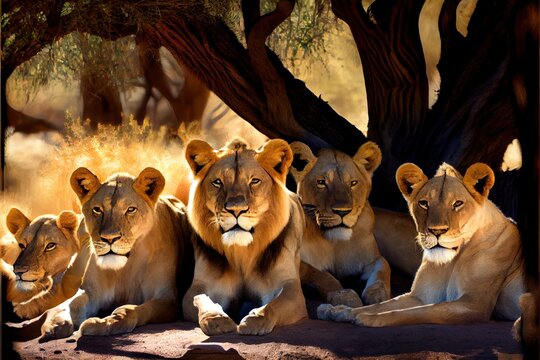

1/1 [==============================] - 0s 76ms/step
Cat


In [50]:
input_image_path = input('Path of image to be predicted')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (224, 224))

input_image_scaled = input_image_resized/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224, 3])

input_prediction= model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print("Cat")
else:
  print("Dog")